# 01 - Data Exploration

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from pathlib import Path
from collections import Counter

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Load and Examine CSV

In [9]:
data_dir = Path('../data/raw')
train_csv = pd.read_csv(data_dir / 'train.csv')

print("Dataset shape:", train_csv.shape)
print("\nFirst rows:")
print(train_csv.head(10))

print("\nColumn names:", train_csv.columns.tolist())
print("\nData types:")
print(train_csv.dtypes)

print("\nMissing values:")
print(train_csv.isnull().sum())

Dataset shape: (3662, 2)

First rows:
        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
5  0083ee8054ee          4
6  0097f532ac9f          0
7  00a8624548a9          2
8  00b74780d31d          2
9  00cb6555d108          1

Column names: ['id_code', 'diagnosis']

Data types:
id_code      object
diagnosis     int64
dtype: object

Missing values:
id_code      0
diagnosis    0
dtype: int64


## Class Distribution Analysis

Class distribution:
diagnosis
0    1805
1     370
2     999
3     193
4     295
Name: count, dtype: int64

Class percentages:
diagnosis
0    49.29
1    10.10
2    27.28
3     5.27
4     8.06
Name: count, dtype: float64


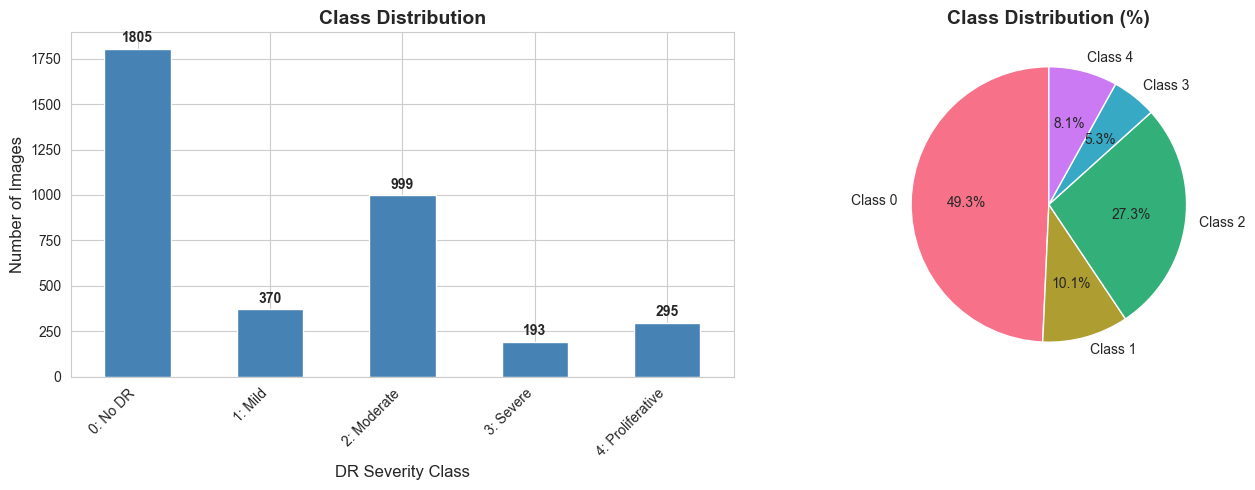

In [10]:
print("Class distribution:")
class_counts = train_csv['diagnosis'].value_counts().sort_index()
print(class_counts)
print("\nClass percentages:")
print((class_counts / len(train_csv) * 100).round(2))

# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
class_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_xlabel('DR Severity Class', fontsize=12)
ax1.set_ylabel('Number of Images', fontsize=12)
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xticklabels(['0: No DR', '1: Mild', '2: Moderate', '3: Severe', '4: Proliferative'], 
                     rotation=45, ha='right')

# Add count labels on bars
for i, v in enumerate(class_counts):
    ax1.text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2.pie(class_counts, labels=[f'Class {i}' for i in range(5)], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", 5))
ax2.set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Check for Duplicates

In [11]:
duplicates = train_csv['id_code'].duplicated().sum()
print(f"Duplicate image IDs: {duplicates}")


Duplicate image IDs: 0


## Load and Examine Sample Images

In [19]:
train_img_dir = data_dir / 'train_images'

def load_sample_images(df, n_per_class=2):
    """Load sample images from each class"""
    samples = {}
    
    for class_id in range(5):
        class_df = df[df['diagnosis'] == class_id]
        sample_ids = class_df.sample(min(n_per_class, len(class_df)))['id_code'].values
        
        samples[class_id] = []
        for img_id in sample_ids:
            img_path = train_img_dir / f"{img_id}.png"
            img = Image.open(img_path)
            samples[class_id].append((img_id, np.array(img)))
    
    return samples


In [20]:
print("Loading sample images...")
sample_images = load_sample_images(train_csv, n_per_class=3)
print("Sample images loaded! ✓")

Loading sample images...
Sample images loaded! ✓


## Visualize Sample Images from each Class

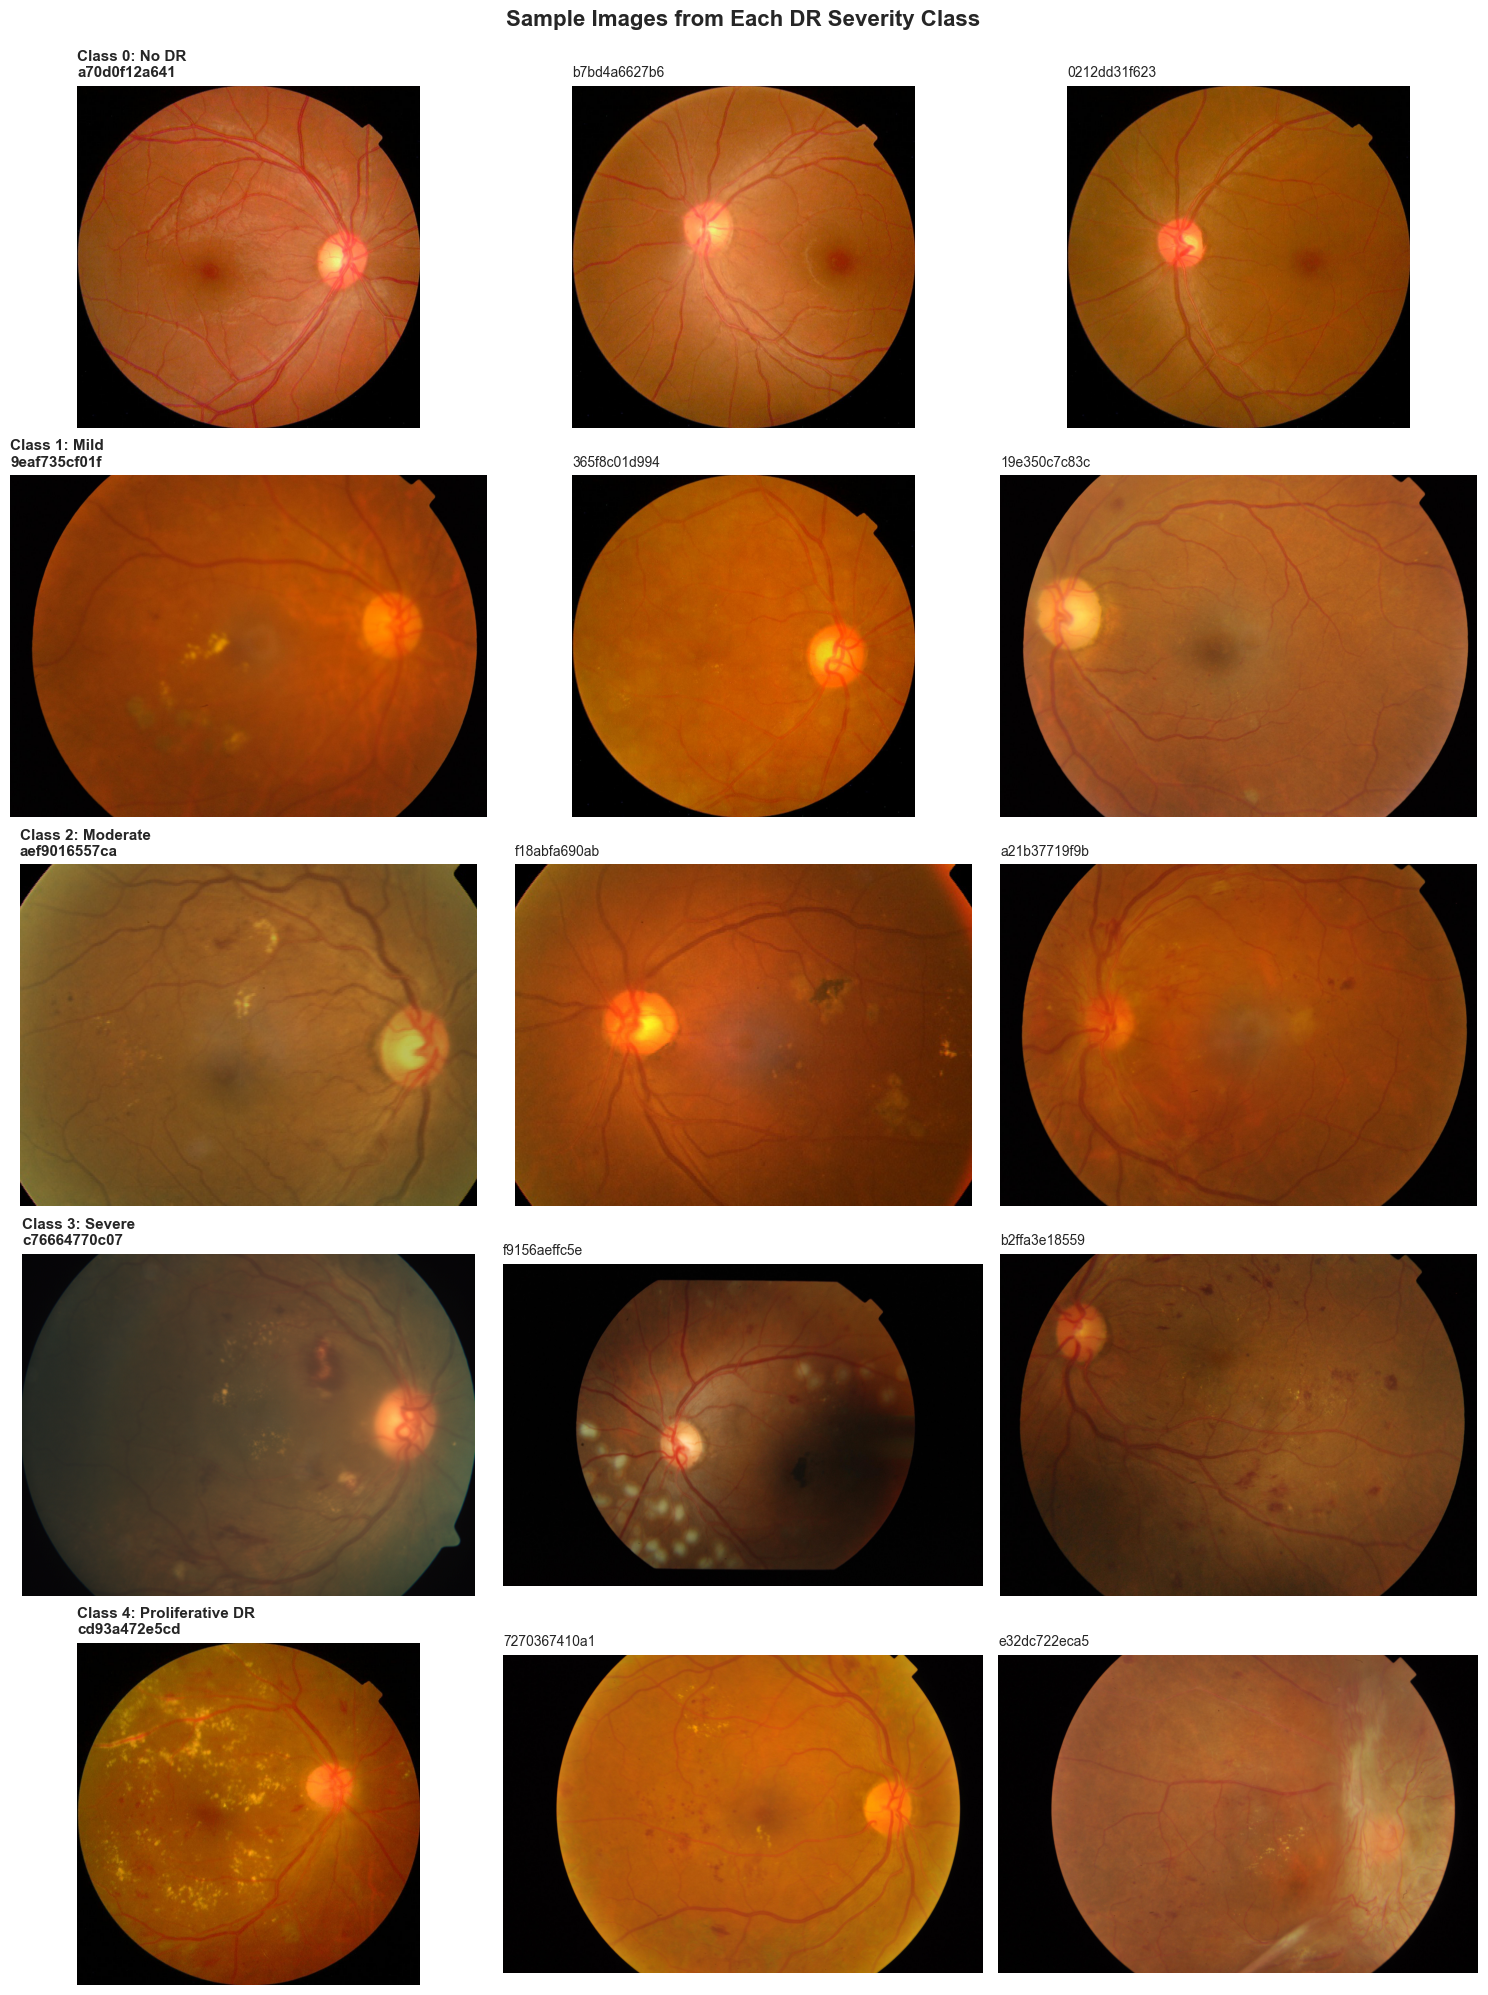

In [21]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.suptitle('Sample Images from Each DR Severity Class', fontsize=16, fontweight='bold', y=0.995)

class_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']

for class_id in range(5):
    for idx, (img_id, img) in enumerate(sample_images[class_id]):
        ax = axes[class_id, idx]
        ax.imshow(img)
        ax.axis('off')
        if idx == 0:
            ax.set_title(f'Class {class_id}: {class_names[class_id]}\n{img_id}', 
                        fontsize=11, fontweight='bold', loc='left')
        else:
            ax.set_title(f'{img_id}', fontsize=10, loc='left')

plt.tight_layout()
plt.show()

## Analyze Image Dimensions

Analyzing image dimensions (sampling 200 images)...

Width stats:
  Min: 640, Max: 4288, Mean: 2044.3, Median: 2416.0

Height stats:
  Min: 480, Max: 2848, Mean: 1533.2, Median: 1736.0


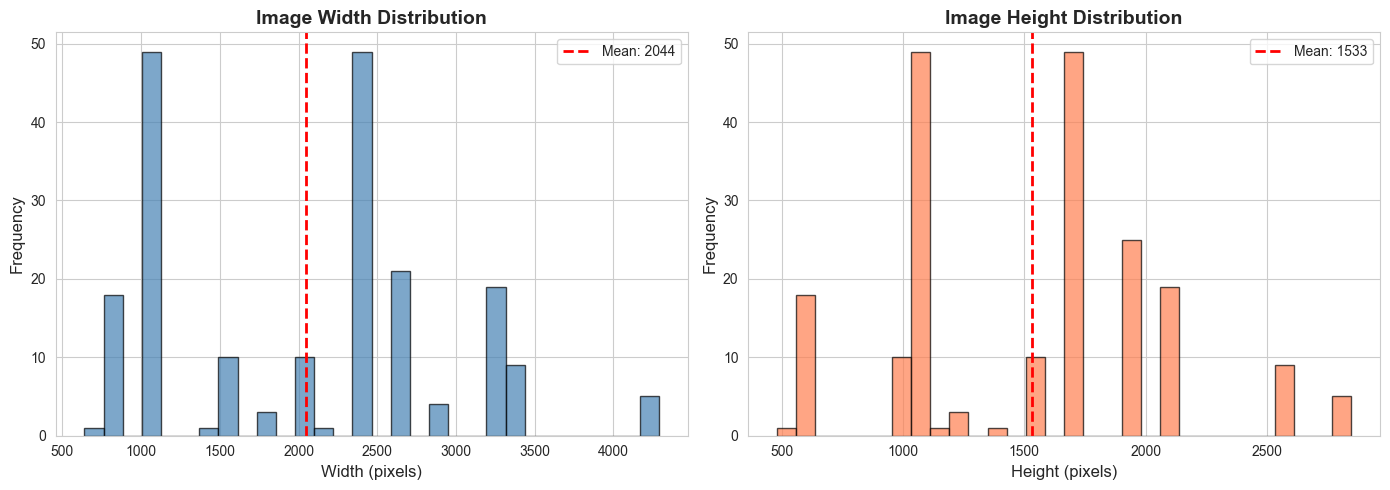

In [22]:
print("Analyzing image dimensions (sampling 200 images)...")
sample_df = train_csv.sample(200)
dimensions = []

for img_id in sample_df['id_code']:
    img_path = train_img_dir / f"{img_id}.png"
    img = Image.open(img_path)
    dimensions.append(img.size)  # (width, height)

dimensions = np.array(dimensions)
widths = dimensions[:, 0]
heights = dimensions[:, 1]

print(f"\nWidth stats:")
print(f"  Min: {widths.min()}, Max: {widths.max()}, Mean: {widths.mean():.1f}, Median: {np.median(widths)}")
print(f"\nHeight stats:")
print(f"  Min: {heights.min()}, Max: {heights.max()}, Mean: {heights.mean():.1f}, Median: {np.median(heights)}")

# Visualize dimension distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(widths, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Width (pixels)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Image Width Distribution', fontsize=14, fontweight='bold')
ax1.axvline(widths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {widths.mean():.0f}')
ax1.legend()

ax2.hist(heights, bins=30, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Height (pixels)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Image Height Distribution', fontsize=14, fontweight='bold')
ax2.axvline(heights.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {heights.mean():.0f}')
ax2.legend()

plt.tight_layout()
plt.show()

## Analyze Image Properties 

In [23]:
print("Analyzing image properties (sampling 100 images)...")
sample_df = train_csv.sample(100)
properties = []

for img_id in sample_df['id_code']:
    img_path = train_img_dir / f"{img_id}.png"
    img = np.array(Image.open(img_path))
    
    # Calculate properties
    mean_brightness = img.mean()
    std_brightness = img.std()
    
    # Check if color or grayscale
    if len(img.shape) == 3:
        n_channels = img.shape[2]
    else:
        n_channels = 1
    
    properties.append({
        'mean_brightness': mean_brightness,
        'std_brightness': std_brightness,
        'channels': n_channels
    })

props_df = pd.DataFrame(properties)

print("\nBrightness stats:")
print(f"  Mean: {props_df['mean_brightness'].mean():.1f}")
print(f"  Std: {props_df['mean_brightness'].std():.1f}")
print(f"\nChannels: {props_df['channels'].unique()}")

Analyzing image properties (sampling 100 images)...

Brightness stats:
  Mean: 58.3
  Std: 15.8

Channels: [3]


## Summary Statistics 

In [24]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"Total images: {len(train_csv)}")
print(f"\nClass distribution:")
for i, count in enumerate(class_counts):
    pct = count / len(train_csv) * 100
    print(f"  Class {i} ({class_names[i]:20s}): {count:4d} ({pct:5.2f}%)")

print(f"\nClass imbalance ratio: {class_counts.max() / class_counts.min():.2f}:1")
print(f"  (Most common / Least common)")

print(f"\nImage dimensions (from sample):")
print(f"  Typical width: {int(np.median(widths))}px")
print(f"  Typical height: {int(np.median(heights))}px")

print(f"\nKey observations:")
print(f"  ✓ Heavy class imbalance - Class 0 dominates")
print(f"  ✓ Will need class balancing strategy")
print(f"  ✓ Images vary in size - need resizing")
print(f"  ✓ Color images (3 channels)")
print("="*60)

DATASET SUMMARY
Total images: 3662

Class distribution:
  Class 0 (No DR               ): 1805 (49.29%)
  Class 1 (Mild                ):  370 (10.10%)
  Class 2 (Moderate            ):  999 (27.28%)
  Class 3 (Severe              ):  193 ( 5.27%)
  Class 4 (Proliferative DR    ):  295 ( 8.06%)

Class imbalance ratio: 9.35:1
  (Most common / Least common)

Image dimensions (from sample):
  Typical width: 2416px
  Typical height: 1736px

Key observations:
  ✓ Heavy class imbalance - Class 0 dominates
  ✓ Will need class balancing strategy
  ✓ Images vary in size - need resizing
  ✓ Color images (3 channels)
